In [13]:
# modules needed to use Scikit-learn image processing in Colab
import skimage.io
from matplotlib import pyplot as plt
import numpy as np

def makePixel(r, g, b):
  """
  Make a RGB pixel suitable for a Scikit-learn image.

  parameters
  ----------
  r : int
    red intensity, in [0, 255]
  g : int
    green intensity, in [0, 255]
  b : int
    blue intensity, in [0, 255]

  returns
  -------
    A pixel with the specified color. 
  """

  pixel = np.ndarray((3,), dtype='uint8')  
  pixel[0] = np.uint8(r)
  pixel[1] = np.uint8(g)
  pixel[2] = np.uint8(b)

  return pixel

def makeBlackImage(shape):
  """
  Make and return a black RGB image of the specified shape.

  parameters
  ----------
  shape : tuple
    shape of the image (rows, cols, channels)

  returns
  -------
    A black Scikit-learn image of the specified size.
  """
  newImg = np.zeros(shape, dtype='uint8')

  return newImg

In [29]:
def chromaKey(foreground, background):
    R = 0
    G = 0
    B = 0
    newIMG = makeBlackImage((foreground.shape[0], foreground.shape[1], 3))
    #skimage.io.imshow(newIMG)
    for row in range(foreground.shape[0]):
        for col in range(foreground.shape[1]):
            if foreground[row][col][0] <= R and foreground[row][col][1] >= G and foreground[row][col][0] <= B:
                # Green Enough
                newIMG[row][col] = background[row][col]
            else:
                #not green enough
                newIMG[row][col] = foreground[row][col]
    return newIMG

In [20]:
!wget "https://github.com/Johang727/CMP145/blob/main/Chapter%206/person.jpeg?raw=true" -O person.jpg
!wget "https://github.com/Johang727/CMP145/blob/main/Chapter%206/background.jpeg?raw=true" -O background.jpg

person = skimage.io.imread('person.jpg')
background = skimage.io.imread('background.jpg')



--2024-11-06 14:33:40--  https://github.com/Johang727/CMP145/blob/main/Chapter%206/person.jpeg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Johang727/CMP145/raw/refs/heads/main/Chapter%206/person.jpeg [following]
--2024-11-06 14:33:40--  https://github.com/Johang727/CMP145/raw/refs/heads/main/Chapter%206/person.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Johang727/CMP145/refs/heads/main/Chapter%206/person.jpeg [following]
--2024-11-06 14:33:40--  https://raw.githubusercontent.com/Johang727/CMP145/refs/heads/main/Chapter%206/person.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

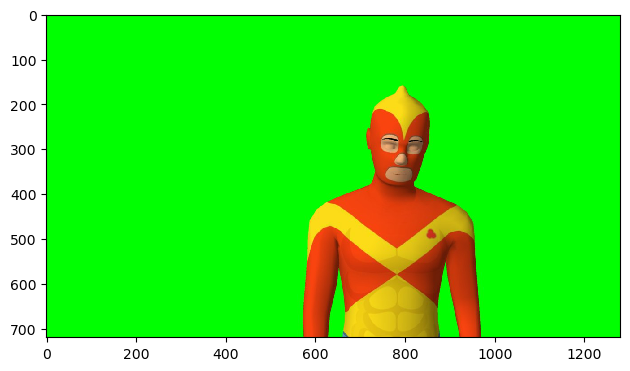

In [23]:
skimage.io.imshow(person)


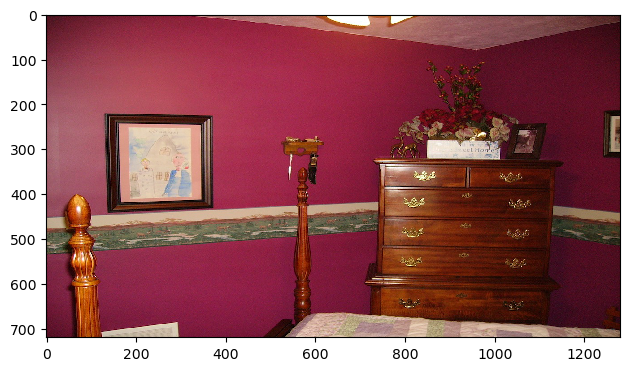

In [ ]:
skimage.io.imshow(background)

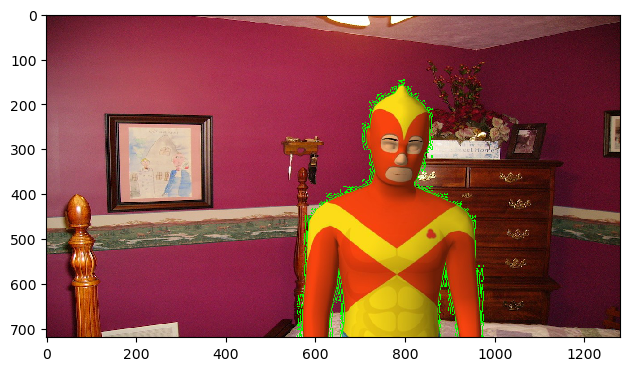

In [30]:
final = chromaKey(person, background)
skimage.io.imshow(final)